http://danifold.net/fastcluster.html?section=3

In [4]:
from fastcluster import linkage

In [5]:
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
X # eight elements in the original set

[[2], [8], [0], [4], [1], [9], [9], [0]]

In [6]:
Z = linkage(X, method='single', metric='euclidean', preserve_input=True)
Z

array([[ 2.,  7.,  0.,  2.],
       [ 5.,  6.,  0.,  2.],
       [ 0.,  4.,  1.,  2.],
       [ 8., 10.,  1.,  4.],
       [ 1.,  9.,  1.,  3.],
       [ 3., 11.,  2.,  5.],
       [12., 13.,  4.,  8.]])

In [7]:
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

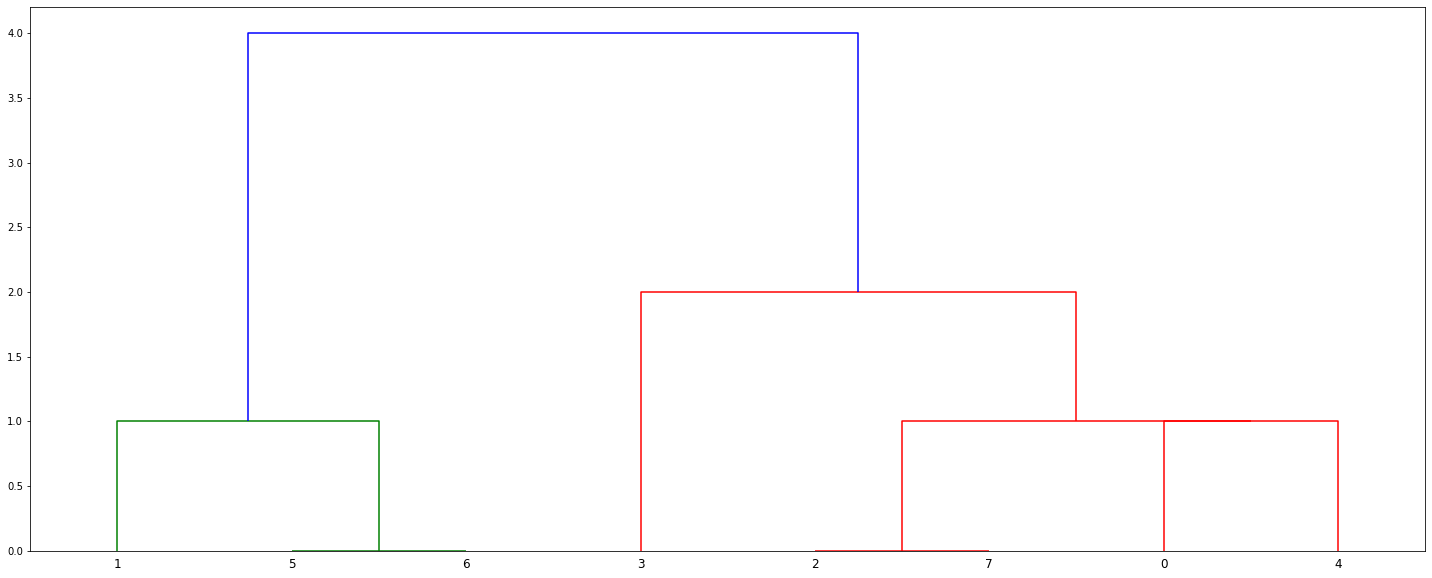

In [9]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [10]:
dn

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [12.5, 12.5, 47.5, 47.5]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.0, 1.0, 1.0],
  [0.0, 2.0, 2.0, 1.0],
  [1.0, 4.0, 4.0, 2.0]],
 'ivl': ['1', '5', '6', '3', '2', '7', '0', '4'],
 'leaves': [1, 5, 6, 3, 2, 7, 0, 4],
 'color_list': ['g', 'g', 'r', 'r', 'r', 'r', 'b']}

# Example from Manual

5.4. A Python example

In [11]:
import fastcluster
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist

In [18]:
from sklearn import datasets
X = iris.data[:, :4]  # we only take the first two features.
y = iris.target
iris = datasets.load_iris()
N = len(X)

In [19]:
iris.data.shape

(150, 4)

In [20]:
X.shape

(150, 4)

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
classes = [ 'g' ] * 50 + [ 'r' ] * 50 + [ 'c' ] * 50

In [34]:
def plot_with_labels(Z, num_clust):
  threshold = Z[-num_clust + 1, 2]
  dg = dendrogram(Z, no_labels = True, color_threshold = threshold) # the color for dendogram line
  color = [classes[k] for k in dg[ 'leaves' ]] # add color. For the bar plot which show the correct label.
  b = .1 * Z[-1, 2]
  plt.bar(np.arange(N) * 10, np.ones(N) * b, bottom = -b, width = 10,
  color = color, edgecolor = 'none' )
  plt.gca().set_ylim((-b, None))
  plt.show()

In [35]:
import fastcluster
Z = fastcluster.linkage(X, method = 'single' )

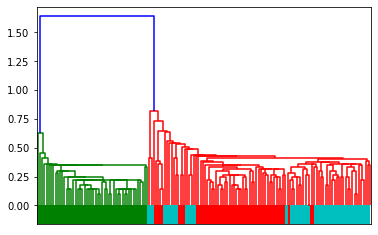

In [36]:
plot_with_labels(Z, 2)

In [37]:
# Using weighted clustering scheme: cityblock L1 distance with weighted method gives less error for Iris data set.

D = pdist(X, metric = 'cityblock' )


In [38]:
Z = fastcluster.linkage(D, method = 'weighted' )

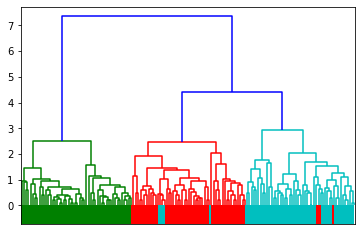

In [39]:
plot_with_labels(Z, 3)

In [41]:
Z.shape

(149, 4)

In [42]:
D.shape

(11175,)

In [46]:
150*149/2

11175.0

In [47]:
X.shape

(150, 4)

# Try vector inputs

## Example 1:

Four points on x-y plane.

In [49]:
from collections import namedtuple
from fastcluster import linkage

Pt = namedtuple('Pt', ['x', 'y'])

In [63]:
X = [i for i in [[1,1], [2,2], [4,2], [4,3]]]
X # four elements in the original set

[[1, 1], [2, 2], [4, 2], [4, 3]]

In [64]:
Z = linkage(X, method='single', metric='euclidean', preserve_input=True)
Z

array([[2.        , 3.        , 1.        , 2.        ],
       [0.        , 1.        , 1.41421356, 2.        ],
       [4.        , 5.        , 2.        , 4.        ]])

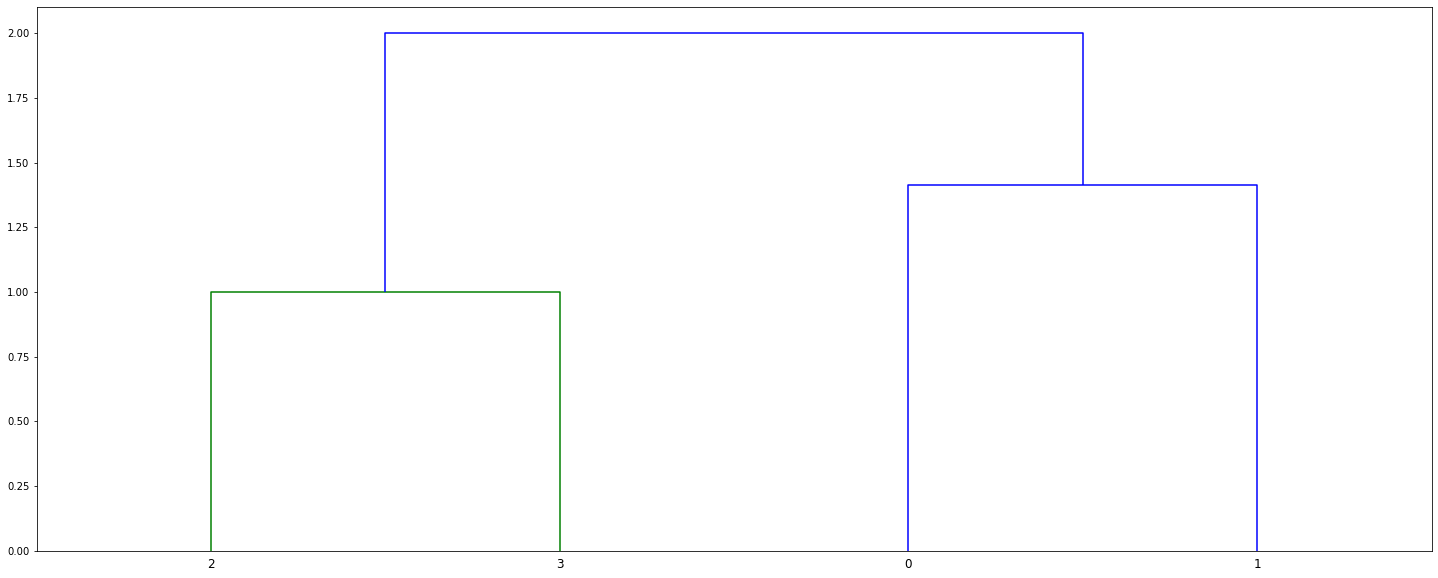

In [65]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [66]:
D1 = pdist(X, metric = 'euclidean' )
D2 = pdist(X, metric = 'cityblock' )

In [67]:
D1

array([1.41421356, 3.16227766, 3.60555128, 2.        , 2.23606798,
       1.        ])

In [68]:
D2

array([2., 4., 5., 2., 3., 1.])

In [70]:
D3 = pdist(X, metric = 'correlation' )
D3

array([           nan,            nan,            nan,            nan,
                  nan, 2.22044605e-16])

In [71]:
D4 = pdist(X, metric = 'cosine' )
D4

array([2.22044605e-16, 5.13167019e-02, 1.00505063e-02, 5.13167019e-02,
       1.00505063e-02, 1.61300899e-02])

## Use user defined function

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/generated/scipy.spatial.distance.pdist.html

squareform
converts between condensed distance matrices and square distance matrices.

In [74]:
import numpy
# p.18 document example of user define function

fn = lambda u, v: numpy.sqrt(((u-v)*(u-v)).sum())

# use pdist to apply distance function and produce dissimilarity matrix

D5 = pdist(X, fn)
D5

array([1.41421356, 3.16227766, 3.60555128, 2.        , 2.23606798,
       1.        ])